In [1]:
import pandas as pd
import numpy as np
import os

In [18]:
"""
Here I have merged all the individual meta_data into one
with the path of each image as one of the columns for the data generator
"""

base_path="./Dataset"
l=[]
c=0
meta_data=None
for sp in os.listdir(base_path):
    if not ".csv" in sp: 
        for file in os.listdir(f'{base_path}/{sp}'):
            if 'csv' in file:
                if c==0:
                    df=pd.read_csv(f'{base_path}/{sp}/{file}')
                    df.columns="||".join(df.columns).lower().split("||")
                    meta_data=df[['phylum', 'class', 'genus', 'species', 'form', 'sample', 'image_name','image_url']]
                    meta_data["img_path"]=f'{base_path}/{sp}/'+meta_data["image_name"]
                    c+=1
                    
                else:
                    df=pd.read_csv(f'{base_path}/{sp}/{file}')
                    df.columns="||".join(df.columns).lower().split("||")
                    df=df[['phylum', 'class', 'genus', 'species', 'form', 'sample', 'image_name','image_url']]
                    df["img_path"]=f'{base_path}/{sp}/'+df["image_name"]
                    meta_data=meta_data.append(df)                


/home/mohsin/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [20]:
print(meta_data.shape)
meta_data.head()

(512, 9)


,phylum,class,genus,species,form,sample,image_name,image_url,img_path
0,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,Egg,Intestinal,Evermicularis_worm4_HB.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_worm4_HB.jpg
1,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,Egg,Intestinal,Evermicularis_egg_HBa.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_HBa.jpg
2,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,Egg,Intestinal,Evermicularis_egg_wtmt.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_wtmt.jpg
3,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,Egg,Intestinal,Evermicularis_SC_egg.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_SC_egg.jpg
4,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,Egg,Intestinal,Evermicularis_egg_UVa.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_UVa.jpg


In [6]:
meta_data.head()

,phylum,class,genus,species,form,sample,image_name,image_url,img_path
0,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_worm4_HB.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_worm4_HB.jpg
1,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_egg_HBa.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_HBa.jpg
2,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_egg_wtmt.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_wtmt.jpg
3,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_SC_egg.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_SC_egg.jpg
4,Nematoda,Chromadorea,Enterobius,Enterobius vermicularis,egg,intestinal tissue,Evermicularis_egg_UVa.jpg,https://www.cdc.gov//dpdx/enterobiasis/images/...,./Dataset/Enterobius/Evermicularis_egg_UVa.jpg


In [10]:
meta_data.genus.sort_index()

0        Enterobius
1        Enterobius
2        Enterobius
3        Enterobius
4        Enterobius
           ...     
507    Echinococcus
508    Echinococcus
509    Echinococcus
510    Echinococcus
511    Echinococcus
Name: genus, Length: 512, dtype: object

In [8]:
meta_data=pd.read_csv("./Dataset/all_meta_data.csv")
meta_data.genus.

In [12]:
"""
This is percentage of each unique category of each attributes before preprocessing
"""

for col in meta_data.columns[:6]:
    print(pd.concat([meta_data[col].value_counts(),meta_data[col].value_counts()/meta_data.shape[0]*100],axis=1,keys=[col,"percentage"]))
    print(f'No of unique elements: {meta_data[col].nunique()}')
    print()
    

                   phylum  percentage
Apicomplexa           219   42.773438
Nematoda              138   26.953125
Platyhelminthes        92   17.968750
Sarcomastigophora      27    5.273438
Amoebozoa              27    5.273438
Ciliophora              9    1.757812
No of unique elements: 6

               class  percentage
Aconoidasida     144   28.125000
Chromadorea      106   20.703125
Conoidasida       75   14.648438
Cestoda           44    8.593750
Enoplea           32    6.250000
Zooflagellate     27    5.273438
Tubulinea         27    5.273438
Tapeworms         22    4.296875
Rhabditophora     19    3.710938
Litostomatea       9    1.757812
Trematoda          7    1.367188
No of unique elements: 11

                   genus  percentage
Plasmodium           144   28.125000
Cyclospora            30    5.859375
Ascaris               29    5.664062
Giardia               27    5.273438
Entamoeba             27    5.273438
Strongyloides         25    4.882812
Hymenolepis           23  

In [35]:
"""
Data cleaning and reducing the no of category of some attributes
"""
meta_data["class"]=meta_data["class"].apply(lambda x:x.strip("\t"))


form={x:"Some" for x in meta_data.form.unique()}
form={'Egg': 'egg',
 'Adult': 'adult',
 'Larva': 'larva',
 'egg': 'egg',
 'adult': 'adult',
 'Encysted larvae': 'larva',
 'larvae': 'larva',
 'Trophozoites': 'trophozoites',
 'Cyst': 'cyst',
 'Oocysts': 'oocysts',
 'Trophozoite': 'trophozoites',
 'oocysts': 'oocysts',
 'sarcocysts ': 'sarcocysts',
 'cyst': 'cyst',
 'Rings': 'rings',
 'Gametocyte': 'gametocyte',
 'Schizont': 'schizont',
 'Ookinete': 'ookinete',
 'larva': 'larva',
 'Unfertilized egg': 'decorticated egg',
 'Infertile decorticated egg': 'decorticated egg',
 'Fertilized egg': 'egg',
 'fertile decorticated egg': 'decorticated egg',
 'Oocyst': 'oocysts',
 'Scolex': 'scolex'}
meta_data.form=meta_data.form.replace(form)


sample={x.lower():"some" for x in meta_data["sample"].unique()}
sample={'intestinal': 'intestinal tissue',
 'fecal': 'feces',
 'feces': 'feces',
 'small intestine': 'intestine ',
 'intestinal tissue': 'intestinal tissue',
 'muscle tissue': 'muscle tissue',
 'bear meat': 'bear meat',
 'mouse': 'macro-organism',
 'brain tissue': 'brain tissue',
 'wet mount': 'wet mount',
 'eye': 'eye',
 'bile duct': 'bile duct',
 'snail': 'macro-organism',
 'wet mounts': 'wet mount',
 'insects': 'macro-organism',
 'ant': 'macro-organism',
 'na': 'na',
 'sputum': 'sputum',
 'blood': 'blood',
 'bile ducts': 'bile duct',
 'sanil': 'macro-organism',
 'tissue': 'intestinal tissue',
 'large intestine': 'intestine ',
 'liver tissue': 'liver',
 'lung tissue': 'lungs',
 'lungs': 'lungs',
 'small intenstine': 'intestine ',
 'lungs tissue': 'lungs',
 'colon tissue': 'intestinal tissue',
 'liver': 'liver'}
meta_data["sample"]=meta_data["sample"].apply(lambda x:x.lower())
meta_data["sample"]=meta_data["sample"].replace(sample)

In [89]:
"""
Lookin at the attributes and the its elements percentage after preprocessing 
"""

for col in c.columns[:6]:
    print(pd.concat([c[col].value_counts(),c[col].value_counts()/c.shape[0]*100],axis=1,keys=[col,"percentage"]))
    print(f'**No of unique elements: {c[col].nunique()}')
    print()
    

                   phylum  percentage
Apicomplexa           215   46.336207
Nematoda              121   26.077586
Platyhelminthes        65   14.008621
Sarcomastigophora      27    5.818966
Amoebozoa              27    5.818966
Ciliophora              9    1.939655
**No of unique elements: 6

               class  percentage
Aconoidasida     144   31.034483
Chromadorea       96   20.689655
Conoidasida       71   15.301724
Cestoda           41    8.836207
Zooflagellate     27    5.818966
Tubulinea         27    5.818966
Enoplea           25    5.387931
Tapeworms         18    3.879310
Litostomatea       9    1.939655
Rhabditophora      6    1.293103
**No of unique elements: 10

                   genus  percentage
Plasmodium           144   31.034483
Cyclospora            30    6.465517
Ascaris               29    6.250000
Giardia               27    5.818966
Entamoeba             27    5.818966
Dibothriocephalus     21    4.525862
Hymenolepis           20    4.310345
Trichuris         

In [67]:
meta_data["sample"]=meta_data["sample"].replace({"bear meat":"na","macro-organism":"na"})

In [16]:
meta_data.form=meta_data.form.replace({"rings":"trophozoites"})

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import os
%matplotlib inline

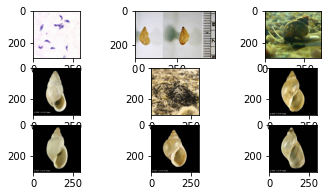

In [66]:
# plt.figure(figsize=(15,15))
l=len(meta_data[meta_data["sample"]=="macro-organism"]["img_path"])
for i,p in enumerate(meta_data[meta_data["sample"]=="macro-organism"]["img_path"]):
    plt.subplot(4,3,i+1)
    plt.imshow(plt.imread(p))
    
    
    

In [64]:
ind=[]
for i in meta_data.img_path:
    try:
        img=plt.imread(i)
    except:
        ind.append(meta_data[meta_data.img_path==i].index.item())
        
#         print(i,)

In [63]:
meta_data.drop(index=ind,inplace=True)

In [75]:
meta_data.form=meta_data.form.replace({"sarcocysts":"na","ookinete":"na","scolex":"na"})


/home/mohsin/.local/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [92]:
for i in c.img_path:
    try:
        imd=plt.imread(i)
        print(imd.shape)
    except:
        print(i)

(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 435, 3)
(300, 382, 3)
(300, 421, 3)
(180, 300, 3)
(188, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 397, 3)
(300, 399, 3)
(300, 473, 3)
(300, 300, 3)
(300, 476, 3)
(300, 300, 3)
(300, 300, 3)
(300, 388, 3)
(300, 358, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(350, 350, 3)
(350, 350, 3)
(311, 350, 3)
(350, 350, 3)
(300, 300, 3)
(300, 300, 3)
(280, 350, 3)
(262, 350, 3)
(250, 350, 3)
(265, 350, 3)
(288, 350, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 336, 3)
(300, 300, 3)
(300, 300, 3)
(300, 332, 3)
(300, 300, 3)
(300, 336, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 300, 3)
(300, 

In [ ]:
"""
Lookin at the attributes and the its elements percentage after preprocessing 
"""

for col in meta_data.columns[:6]:
    print(pd.concat([meta_data[col].value_counts(),meta_data[col].value_counts()/meta_data.shape[0]*100],axis=1,keys=[col,"percentage"]))
    print(f'**No of unique elements: {meta_data[col].nunique()}')
    print()
    